In [4]:
import numpy as np

def random_spin_field(X, Y):
    return np.random.choice([-1, 1], size=(X, Y))

random_spin_field(10, 10)

# pip install
from PIL import Image

def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255)) #0...255

display_spin_field(random_spin_field(200, 200))


def ising_step(field, beta = 0.4):
    X, Y  = field.shape
    for x_offset in range(2):
        for y_offset in range(2):
            for x in range(x_offset, X, 2):
                for y in range(y_offset, Y, 2):
                    _ising_update(field, x, y, beta)
    return field
    
def _ising_update(field, x, y, beta):
    total = 0
    X ,Y = field.shape
    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            if i == x and j == y:
                continue
            total += field[i % X, j % Y]
    dE = 2 * field[x, y] * total
    if dE <= 0:
        field[x, y] *= -1
    elif np.exp(-dE * beta) > np.random.rand():
        field[x, y] *= -1
  
    display_spin_field(ising_step(random_spin_field(200, 200)))

In [1]:
!pip install ipywidgets
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame = (0, len(images) - 1)):
        return display_spin_field(images[frame])
    return interact(_show)


images = [random_spin_field(200,200)]
for i in range(100):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images)

NameError: name 'random_spin_field' is not defined

1000


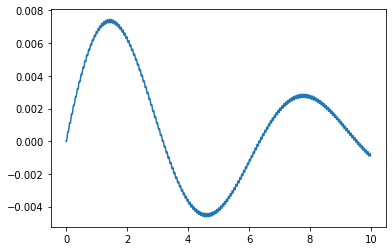

In [10]:
import matplotlib.pyplot as plt
x_0 = pow(10, -8)
v_0 = 0
dt = 0.01
m = pow(10, -8)
k = pow(10, -3)
v = pow(10, -6)
w_0 = np.sqrt(k/m)
a = v/(w_0 * m)
x, v = x_0, v_0
lx = []; lt = []              
for i in range(int(input())):
    time = dt * i
    lt.append(time)
    dxdt = v
    dvdt = -a * v - x + np.sin(100 * time)
    x = x + dxdt * dt
    v = v + dvdt * dt
    lx.append(x)

plt.plot(lt, lx)
plt.show()